<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

We will use regression with multiple variables here. Price can be calculated using following equation,

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [1]:
import os
path="E:\Machine Learning\introduction to machine learning\Supervised lerning\Regression models\Linear regression\Multiple_regration"
os.chdir(path)

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


**Data Preprocessing: Fill NA values with median value of a column**

In [5]:
df.bedrooms.median()

4.0

In [7]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
# skewness along the index axis
df.skew( skipna = True)

area       -0.152701
bedrooms    0.667628
age         0.671732
price       0.895962
dtype: float64

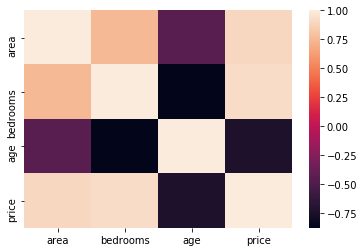

In [19]:

sns.heatmap(df.corr());

In [8]:
#reg.fit(df[['area','bedroom','age']],df.price)
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.score(df.drop('price',axis='columns'),df.price)

0.9550196399325819

In [13]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [14]:
reg.intercept_

221323.00186540408

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [16]:
sqr= int(input('pleas input your sqr ft area '))
bedroom= int(input('pleas input your bedrooms '))
year= int(input('pleas input your year '))
reg.predict([[sqr, bedroom,year]])

pleas input your sqr ft area 3000
pleas input your bedrooms 3
pleas input your year 40


array([498408.25158031])

In [15]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [17]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])

<h3>Exercise<h3>

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**


<h3>Answer<h3>

53713.86 and 93747.79

In [20]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [25]:
d2 = pd.read_csv("hiring.csv")
d2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [27]:
d2.experience = d2.experience.fillna("zero")
d2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [28]:
d2.experience = d2.experience.apply(w2n.word_to_num)
d2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [37]:
import math
median_test_score = math.floor(d2['test_score(out of 10)'].mean())
median_test_score


7

In [39]:
d2['test_score(out of 10)'] = d2['test_score(out of 10)'].fillna(median_test_score)
d2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [40]:
# skewness along the index axis
d2.skew( skipna = True)

experience                    0.391438
test_score(out of 10)         0.610583
interview_score(out of 10)    0.262145
salary($)                    -0.258393
dtype: float64

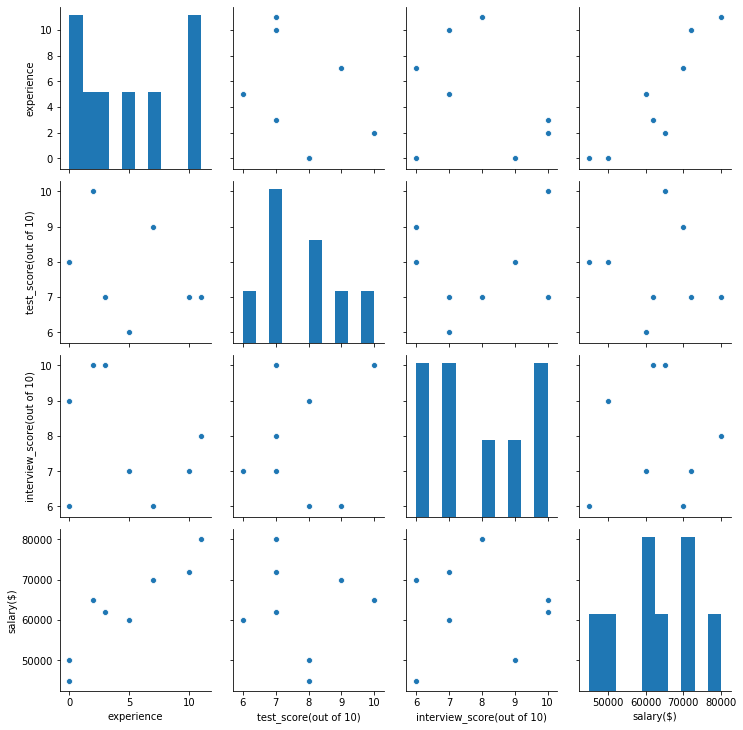

In [41]:
sns.pairplot(d2)

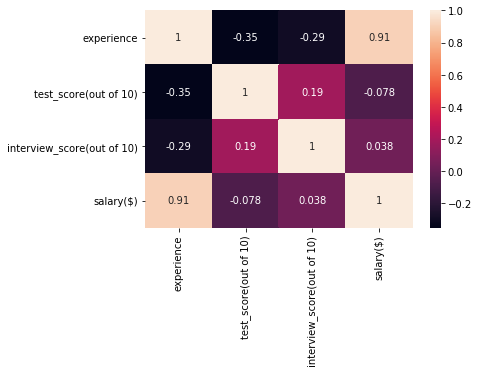

In [43]:
import matplotlib.pyplot as plt
sns.heatmap(d2.corr(),annot=True)
plt.show()

# Test and train data set 

In [44]:
reg = linear_model.LinearRegression()
reg.fit(d2[['experience','test_score(out of 10)','interview_score(out of 10)']],d2['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
exp= int(input("Pleas input your experience:"))
test= int(input("Pleas input your test_score(out of 10):"))
inter= int(input("Pleas input yourinterview_score(out of 10):"))

print("Your Salarly is =",reg.predict([[exp,test,inter]]))

Pleas input your experience:2
Pleas input your test_score(out of 10):8
Pleas input yourinterview_score(out of 10):9
Your Salarly is = [57935.00537075]
